## Strategia (ang. Strategy)

**Typ**: behawioralny \
**Zakres**: obiektowy \
**Inne nazwy**: polityka (ang. policy)

<div style="border: solid 1px;padding: 20px;text-align: center">
    Wzorzec <b>strategia</b> tworzy rodzinę algorytmów (zachowań), które można łatwo podmienić </br><b>w trakcie wykonywania programu</b> (ang. runtime).
</div>

Diagram klas

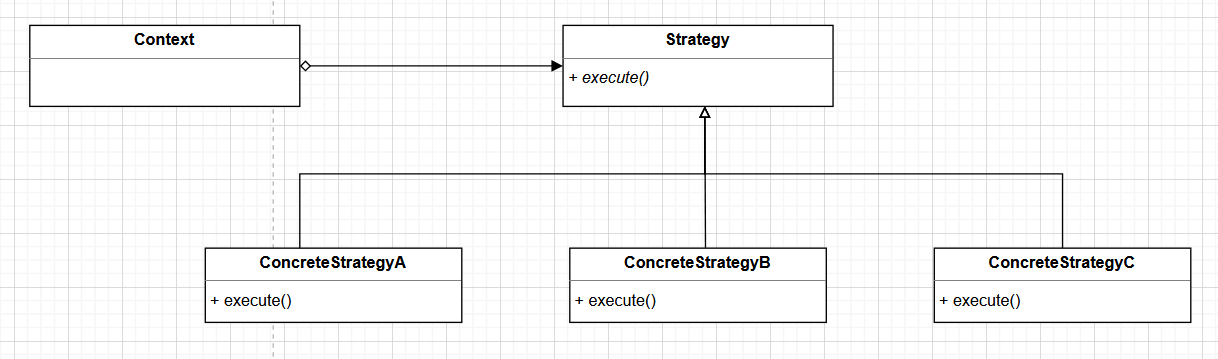

Mamy jakiś obiekt. Ten obiekt ma swoje zachowanie. Ale to co on robi można zrobić na kilka sposobów. Chcemy mieć możliwość łatwej podmiany sposobu wykonywania zadania w trakcie działania programu. Wzorzec strategia może nam w tym pomóc.

### Duck game

Zróbmy grę, której akcja toczy się w wirtualnym stawie z kaczkami. Poprzedni zespół projektowy, który pracował nad powstaniem tej gry zdecydował się na wykorzystanie dziedziczenia. Utworzył jedną klasę nadrzędną Duck. Popatrzmy na kod biblioteki, którą napisali.

In [1]:
import abc


class IDuck(abc.ABC):
    def quack(self):
        print("Kwa kwa")

    def swim(self):
        print("Pływam")

    # reprezentacja napisowa jest metodą abstrakcyjną, ponieważ
    # poszczególne typy kaczek różnią się od siebie,
    @abc.abstractmethod
    def __str__(self):
        pass


class WildDuck(IDuck):
    """Kaczka krzyżówka (aka kaczka dzika)"""
    def __str__(self):
        return "Jestem kaczką krzyżówką"


class Shoveler(IDuck):
    """Płaskonos"""
    def __str__(self):
        return "Jestem kaczką płaskonos"


class RubberDuck(IDuck):
    """Gumowa kaczka"""
    def quack(self):
        print("Piszczę")

    def __str__(self):
        return "Jestem gumową kaczką"

Puśćmy tę grę. W naszej grze będą dwie kaczki. Krzyżówka i gumowa. Niech sobie chwilę pokwaczą, a potem odpłyną.

In [2]:
# client code
duck1 = WildDuck()
duck2 = RubberDuck()

duck1.quack()
duck2.quack()
duck1.swim()
duck2.swim()

Kwa kwa
Piszczę
Pływam
Pływam


Zarząd podjął decyzję - Kaczki muszą latać! Bierzemy się do roboty. Będziemy musieli trochę zmodyfikować kod biblioteki. Gdzie by tutaj podziałać ?

Moglibyśmy wstawić do każdej klasy (WildDuck, Shovler, ...) umiejętność latania. Ale pamiętamy o zasadzie DRY. I że należy się jej trzymać. Ale czy nie po to właśnie mamy dziedzienie w obiektówce? Tak jest! Wsadźmy umiejętność latania do interfejsu.

In [3]:
import abc


class IDuck(abc.ABC):
    def quack(self):
        print("Kwa kwa")

    def fly(self):
        print("Latam")
        
    def swim(self):
        print("Pływam")

    # reprezentacja napisowa jest metodą abstrakcyjną, ponieważ
    # poszczególne typy kaczek różnią się od siebie,
    @abc.abstractmethod
    def __str__(self):
        pass


class WildDuck(IDuck):
    """Kaczka krzyżówka (aka kaczka dzika)"""
    def __str__(self):
        return "Jestem kaczką krzyżówką"


class Shoveler(IDuck):
    """Płaskonos"""
    def __str__(self):
        return "Jestem kaczką płaskonos"


class RubberDuck(IDuck):
    """Gumowa kaczka"""
    def quack(self):
        print("Piszczę")

    def __str__(self):
        return "Jestem gumową kaczką"

Zagrajmy sobie jeszcze przed opublikowaniem nowej wersji gry. Tak w ramach przetestowania. Scenariusz gry wygląda następująco: 
- mamy trzy kaczki - dziką, płaskonos i gumową
- wszystkie zakwaczą a następnie dzika odfrunie, płaskonos odpłynie a gumowa nie zrobi nic

In [4]:
# client code
duck1 = WildDuck()
duck2 = Shoveler()
duck3 = RubberDuck()

duck1.quack()
duck2.quack()
duck3.quack()

duck2.fly()
duck1.swim()

Kwa kwa
Kwa kwa
Piszczę
Latam
Pływam


No i super! Wypychamy kod na produkcję i idziemy na zasłużoną kawę. Niestety, po chwili ktoś zrobił 3 gumowe kaczki i wszystkie mu odfrunęły.

In [5]:
# client code
duck3.fly()

Latam


Zastanówmy się jak to szybko poprawić. W zasadzie w gumowej kaczce moglibyśmy zrobić to samo co z metodą quack. Dorabiamy do RubberDuck oddzielną implementację metody `fly`.

In [6]:
class RubberDuck(IDuck):
    """Gumowa kaczka"""
    def quack(self):
        print("Piszczę")

    def fly(self):
        print("Nie robię nic")

    def __str__(self):
        return "Jestem gumową kaczką"

In [7]:
# client code
duck = RubberDuck()
duck.quack()
duck.fly()

Piszczę
Nie robię nic


Dobra, pożar ugaszony. To teraz, zastanówmy się na spokojnie nad tematem. Wydaje się, że wymaga on trochę głębszej analizy. Bo co się stanie jak dodamy do programu inne sztuczne kaczki, np. kaczę drewnianą. Będzie trzeba oddzielnie uwzględnić w niej te zmiany. A miało być tak DRY!

In [8]:
class WoodenDuck(IDuck):
    """Drewniana kaczka"""
    def quack(self):
        print("Nie robię nic")

    def fly(self):
        print("Nie robię nic")

    def __str__(self):
        return "Jestem drewnianą kaczką"

Widać, że metody `quack` i `fly` będą się różniły pomiędzy różnymi rodzajami kaczek.  

A tu dostajemy dokument stwierdzający, że zarząd firmy postanowił intensywnie rozwijać produkt i wprowadzać różne modyfikację co dwa miesiące. Możemy się więc w niedługim czasie spodziewać całej masy nowego rodzaju kaczek.

Specyfikacja będzie się ciągle zmieniać i prawdopodobnie będziemy musieli szczegółowo analizować i zmieniać metody `fly` i `quack` dla każdej nowej implementacji IDuck.


W tym miejscy zauważamy kilka minusów dziedziczenia dla naszego programu:
1. Kod programu jest duplikowany w kolejnych podklasach
2. Trudno zmienić zachowania metod podczas działania programu (o tym za chwilę)
3. Trudno zebrać informacje o zachowaniach wszystkich kaczek (no bo co jeżeli chcielibyśmy sprawdzić wszystie dotychczasowo zaimplementowane sposoby latania. Nie pozostaje nic innego jak przejść się po każdej implementacji IDuck i porównać metody fly. Nie ma jednego łatwo dostępnego miejsca, gdzie zebrane są wszystkie dotychczas zaimplementowany metody latania)
4. Wprowadzone zmiany mogą mieć niezamierzony wpływ na inne kaczki

Potrzebujemy lepszego rozwiązania. Podklasy będą mieć różne zachowania opisujące latanie czy kwakanie, stąd możemy śmiało założyć, że dziedziczenie nie jest tutaj najlepszym rozwiązaniem. Wiemy, że metody `fly` oraz `quack` są tymi częściami superklasy Duck, które podlegają zmianom "od kaczki do kaczki". To jest zmieniający się fragment. A zmieniające się fragmenty chcemy wydzielać i hermetyzować.

**Zidentyfikuj fragmenty aplikacji, które się zmieniają i oddziel je od tych, które pozostają stałe (oddzielenie tego, co się zmienia, od tego, co pozostaje niezmienione)**

Aby wydzielić omawiane zachowania z superklasy Duck, musimy wyciągnąć obydwie metody z wnętrza tej klasy. Następnie możemy utworzyć zestaw nowych klas (ew. funkcji, ale my skupiamy sie na świecie obiektowym więc zostaniemy przy klasach) reprezentujących poszczególne zachowania.

Ok, czyli plan jest taki. Najpierw implementujemy zestaw klas reprezentujący różne realizacje zachowania (np. latania), a potem konkretne zachowanie przypisujemy kaczce. Zwróć uwagę, że w ten sposób przenosimy zachowanie z dziedziczenia do kompozycji. Kaczka nie będzie dziedziczyć zachowania, ale będzie się z niego składała. 
Zróbmy przykład na dzikiej kaczce i implementacji latania.

Najpierw zachowanie.

In [11]:
# TODO: klasa odpowiedzialna za latanie

class FlyWithWings:
    def fly(self):
        print("Latam!!")

Ok, zachowanie. Teraz to zachowanie trzeba jakoś wprowadzić do kaczki. 

### Dziedziczenie vs Kompozycja

Moglibyśmy potraktować te zachowania jak domieszki (mixiny) i zrobić to przez dziedziczenie (w Pythonie mamy wielodziedziczenie). 

In [12]:
class WildDuck(FlyWithWings, IDuck):
    """Kaczka krzyżówka (aka kaczka dzika)"""
    def __str__(self):
        return "Jestem kaczką krzyżówką"

I ok, możemy. Nasz kaczka będzie umiała latać.

In [13]:
# client code
duck = WildDuck()
duck.fly()

Latam!!


Potencjalny problem jest gdzieś indziej. Chodzi o to, że nasze obecne rozwiązanie uniemożliwia inną fajną rzecz, którą być może chcielibyśmy mieć w naszym projekcie. Możliwość dynamicznej zmiany zachowania wybranej kaczki (tzn. bez zmiany samego obiektu). Czyli powiedzmy, że mamy dwa sposoby latania.

In [14]:
class FlyWithWings():
    def fly(self):
        print("Latam")


class FlyNoWay():
    def fly(self):
        print("Nie robię nic")

I klasę Dzikiej kaczki.

In [15]:
class WildDuck(IDuck, FlyWithWings):
    """Kaczka krzyżówka (aka kaczka dzika)"""
    def __str__(self):
        return "Jestem kaczką krzyżówką"

I teraz załóżmy, że chcielibyśmy móc już **w trakcie gry** zmienić naszej kaczce sposób w jaki lata. Powiedzmy, że gra się rozpoczyna

In [16]:
# client code
duck = WildDuck()
duck.fly()

Latam


Kaczka poleciała, ale w zaroślach był myśliwy, przestrzelił jej skrzydło i teraz nie może już latać. Jak moglibyśmy taki scenariusz zrealizować w trakcie działania gry? W naszym rozwiązaniu jest to niemożliwe. Zmianę trzeba zrobić w kodzie biblioteki. Ale nawet gdybyśmy zrobili taką zmianę

In [17]:
class WildDuck(IDuck, FlyNoWay):
    """Kaczka krzyżówka (aka kaczka dzika)"""
    def __str__(self):
        return "Jestem kaczką krzyżówką"

to od jej wprowadzenia wszystkie dzikie kaczki nie będą potrafiły latać. A my chcemy móc **w trakcie działania programu** móc **konkretnej instancji kaczki** podmienić zachowanie. Czyli mamy kaczkę krzyżówkę i chcemy mieć możliwość tego, żeby kod kliencki w trakcie wykonywania programu (runtime) zmienił tej jednej, konkretnej kaczce umiejętność latania z FlyWithWings na FlyNoWay. Chcemy mieć po prostu możliwość dynamicznego przypisywania zachowań. Czy coś takiego jest możliwe ?

Tak! Coś takiego możemy osiągnąć używając kompozycji.

In [18]:
class WildDuck(IDuck):
    """Kaczka krzyżówka (aka kaczka dzika)"""
    def __init__(self):
        self.fly_behavior = FlyWithWings()
    
    def perform_fly(self):
        self.fly_behavior.fly()

    def __str__(self):
        return "Jestem kaczką krzyżówką"

W ten sposób jedną z właściwości dzikiej kaczki jest umiejętność latania. I do tej umiejętności przypisana jest odpowiednia klasa. Kaczka sama w sobie nie lata, ale ma metodę `perform_fly`, za pomocą której oddelegowuje latanie do odpowiedniego (swojego) zachowania. Jak zmienimy kaczce zachowanie, to kaczka zacznie wykonywać latanie w inny sposób. Sprawdźmy to.

In [19]:
# client code
duck = WildDuck()

# polećmy
duck.perform_fly()

# strzał, kaczka przestaje umieć latać
duck.fly_behavior = FlyNoWay()

# polećmy teraz
duck.perform_fly()

Latam
Nie robię nic


In [18]:
# strzał, kaczka przestaje umieć latać
duck.fly_behavior = FlyNoWay()

# polećmy teraz
duck.perform_fly()

Nie robię nic


Udało się! Zmieniliśmy naszej kaczce sposób wykonywania umiejętności. I to wszystko w ramach jednej gry. Bez grzebania w kodzie biblioteki.

To jest istota wzorca strategii.

Dobra to teraz tylko zapiszmy wszystko zgodnie z prawidłami sztuki. Dorobimy interfejsy, tak żeby nasz kod był samodokumentujący sie. Żeby, programiści którzy przyjdą po nas, po jednym spojrzeniu w kod wiedzieli co muszą zrobić jeżeli chcieliby stworzyć nowy rodzaj kaczki, a co muszą zrobić jeżeli chcieliby stworzyć nowy rodzaj latania lub kwakania. Do reprezentacji poszczególnych zachowań wykorzystamy intefejsy (IFlayable, IQuackable) - a każda realizacja danego zachowania będzie po prostu implementowała jeden z nich. Tym razem jednak to nie klasa Duck będzie przechowywała implementacje wspomnianych interfejsów. Zamiast tego utworzymy **rodziny klas** (w naszym przykładzie dwie rodziny: latanie i kwakanie), których jedynym przeznaczeniem będzie reprezentowanie konkretnych zachowań i to właśnie one będą przechowywały implementacje.

1. Implementujemy rodzinę zachowań - latanie 

In [27]:
# latania
# TODO: rodzina strategii latania
from abc import ABC, abstractmethod

class IFlyable(ABC):
    @abstractmethod
    def fly(self):
        ...


class FlyWithWings(IFlyable):
    def fly(self):
        print("Latam")


class FlyNoWay(IFlyable):
    def fly(self):
        print("Nie robię nic")

2. Implementujemy rodzinę zachowań - kwakanie

In [28]:
# kwakania
# TODO: rodzina strategii kwakania
from abc import ABC, abstractmethod

class IQuackable(ABC):
    @abstractmethod
    def quack(self):
        ...


class Quack(IQuackable):
    def quack(self):
        print("Kwa kwa")


class Squack(IQuackable):
    def quack(self):
        print("Piszczę")


class QuackNoWay(IQuackable):
    def quack(self):
        print("Nie robię nic")

3. Implementujemy rodzinę kaczek

In [29]:
import abc


# Kaczki
class IDuck(abc.ABC):
    # Zakładamy, że wszystkie kaczki pływają i potrafią wykonywać quack i fly (nawet te gumowe i drewniane)
    # ale realizacja tych zachowań jest oddelegowana do innej klas (implementujcych interfejy flyable i quackable)

    def perform_quack(self):
        self.quack_behavior.quack()

    def perform_fly(self):
        self.fly_behavior.fly()

    def swim(self):
        print("Pływam")

    @abc.abstractmethod
    def __str__(self):
        pass


class WildDuck(IDuck):
    """Kaczka krzyżówka (aka kaczka dzika)"""
    def __init__(self):
        # TODO: komponujemy kaczkę z zachowań
        self.quack_behavior = Quack()
        self.fly_behavor = FlyWithWings()

    def __str__(self):
        return "Jestem kaczką krzyżówką"


class Shoveler(IDuck):
    """Płaskonos"""
    def __init__(self):
        self.quack_behavior = Quack()
        self.fly_behavior = FlyWithWings()

    def __str__(self):
        return "Jestem kaczką płaskonos"


class RobberDuck(IDuck):
    """Gumowa kaczka"""
    def __init__(self):
        self.quack_behavior = Squack()
        self.fly_behavior = FlyNoWay()

    def __str__(self):
        return "Jestem gumową kaczką"


class WoodenDuck(IDuck):
    """Drewniana kaczka"""
    def __init__(self):
        self.quack_behavior = QuackNoWay()
        self.fly_behavior = FlyNoWay()

    def __str__(self):
        return "Jestem gumową kaczką"


Mamy tutaj interfejs strategii latanie i dwi implementacje tej strategii - latanie ze skrzydałami i nie latania, oraz iterfejs strategii kwakania i trzy implementacje tej strategii - kwakania, piszczenie i nie kwakanie.

Możemy też zaszaleć i przechowywać strategie jak property kaczki jeżeli mamy ochotę. Ale nie ma takiej konieczności.

In [30]:
class IDuck(abc.ABC):
    def __init__(self):
        self._quack_behavior: IQuackable
        self._fly_behavior: IFlyable

    @abc.abstractmethod
    def perform_quack(self):
        self.quack_behavior.quack()

    def perform_fly(self):
        self.fly_behavior.fly()

    def swim(self):
        print("Pływam")

    @property
    def quack_behavior(self):
        return self._quack_behavior

    @quack_behavior.setter
    def quack_behavior(self, new_behavior: IQuackable):
        self._quack_behavior = new_behavior

    @property
    def fly_behavior(self):
        return self._fly_behavior

    @fly_behavior.setter
    def fly_behavior(self, new_behavior: IFlyable):
        self._fly_behavior = new_behavior

    @abc.abstractmethod
    def __str__(self):
        pass


class WildDuck(IDuck):
    """Kaczka krzyżówka (aka kaczka dzika)"""
    def __init__(self):
        super().__init__()
        self._quack_behavior = Quack
        self._fly_behavior = FlyWithWings

    def __str__(self):
        return "Jestem kaczką krzyżówką"


class Shoveler(IDuck):
    """Płaskonos"""
    def __init__(self):
        super().__init__()
        self._quack_behavior = Quack
        self._fly_behavior = FlyWithWings

    def __str__(self):
        return "Jestem kaczką płaskonos"


class RobberDuck(IDuck):
    """Gumowa kaczka"""
    def __init__(self):
        super().__init__()
        self._quack_behavior = Quack()
        self._fly_behavior = FlyNoWay()

    def __str__(self):
        return "Jestem gumową kaczką"


class WoodenDuck(IDuck):
    """Drewniana kaczka"""
    def __init__(self):
        super().__init__()
        self._quack_behavior = QuackNoWay()
        self._fly_behavior = FlyNoWay()

    def __str__(self):
        return "Jestem gumową kaczką"

Uproszczony (bez rodziny IQuackable) diagram klas naszego przykładu ma postać:

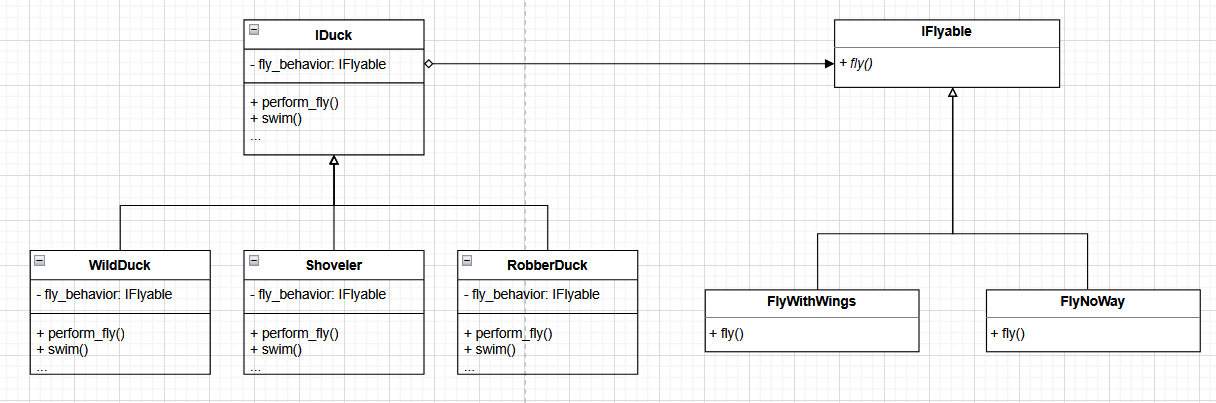